### BUILDING AN IMAGE CLASSIFIER USING SEQUENTIAL API

+ First we need to load Fashion MNIST dataset.
+ It has 70,000 greyscale images, 28x28 pixels with 10 classes.
+ Here the data image is represented as 28x28 array rather than 1D array of size 784.
+ Pixel intensities are represented as integers.
+ the dataset is already splitted to training and test set.
+ now the data is to be splitted to validation set.

+ Since we are going to train neural network using gradient descent.
+ We must scale the features which is pixel down to [0-1] by dividing by 255.0

+ after training the model.
+ the `training accuracy = 91%`, `validation accuracy = 88%`
+ If the Perfomance on the Training set is much better than on the validation set, the model is overfitting the training set.

In [75]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [55]:
## use keras to load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print("===================Shape of the Full Training and Test Set======================")
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

## the dataset is already splitted to training and test set.
## now the data is to be splitted to validation set.
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
print("===================Shape of the Training and Test Set after the Splitting to Validation Set======================")
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

## for fashion mnist, the class names are
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
print(class_names)

## first example in the trainning set 
print(y_train[2])
print(class_names[y_train[0]])
print(class_names[y_train[2]])

print("==============Building the Model using Sequntial API=======================")
##defining the model
## this is the line to reate the sequential model
## simplest kind of keras model for neural networks, this is called sequential API.
model = keras.models.Sequential()
## First Layer is Flatten Layer
## This will convert each input image to 1D array.
## here we have to specify the input shape  = (28,28)
## we dont need to give the batch size here. only the input shape.
## alternatively we can give keras.layers.InputLayer(input_shape=[28,28])
model.add(keras.layers.Flatten(input_shape = [28,28]))
## next layer is dense layer with 300 neurons.
## it will use ReLU activation function.
model.add(keras.layers.Dense(300, activation = "relu"))
## next layer is also a Dense layer with 100 neurons
## it also uses the ReLU activation function.
model.add(keras.layers.Dense(100, activation = "relu"))
## next layer is the final layer with 10 neurons. to classify the 10 classes.
## here using the softmax actiavtion function.
model.add(keras.layers.Dense(10, activation = "softmax"))

# ## we can do the same thing in the given below manner as well
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28,28]),
#     keras.layers.Dense(300, activation = "relu"),
#     keras.layers.Dense(100, activation = "relu"),
#     keras.layers.Dense(10, activation = "softmax")
# ])

## printing the model summary
print(model.summary())
## print the model layers
print(model.layers)
## check the first hidden layer
hidden1 = model.layers[1]
print(hidden1.name)
## checking the weights and biases.
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

print("=================Compiling the model=====================")
## compile the model
## compile is to specify the loss fnuction and optimizer to use while training and evaluating.
## also we can give the metrics to use while training and evaluating model.
## using loss = "sparse_categorical_crossentropy"
## using optimizer as "sgd" which is stochcastic gradient descent.
## using the metrics as "accuracy"
model.compile(loss = "sparse_categorical_crossentropy",
                 optimizer = "sgd",
                 metrics = ["accuracy"])

print("================Training the Model=======================")
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

===================Shape of the Full Training and Test Set======================
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
===================Shape of the Training and Test Set after the Splitting to Validation Set======================
(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
7
Coat
Sneaker
==============Building the Model using Sequntial API=======================
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_19 (Flatten)        (None, 784)               0         
                                                                 
 dense_57 (Dense)            (None, 300)               235500    
                                                                 
 dense_58 (Dense)            (None, 100)               30100     
                        

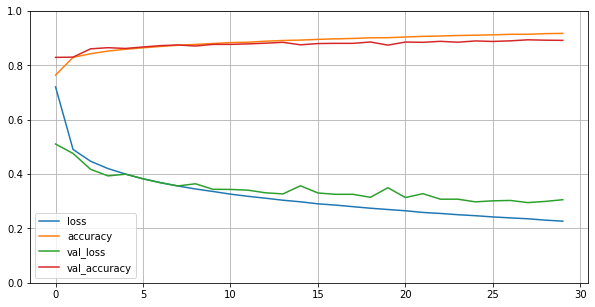

In [60]:
## plotting the scores
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (10,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Here the training and validation accuracy is almost similar.

+ There is no much Overfitting.

If you are not satisfied with your Perfomance of your Model, you should go back and tune Hyperparameters.

+ tweak the learning rate.
+ try another optimizer.
+ increase or decrease the number of layers in NN.
+ increase or decrease the number of nuerons per layer.
+ type of activation function used.
+ tweak the batch size.

In [61]:
## evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 79.4376 - accuracy: 0.8261


[79.43755340576172, 0.8260999917984009]

Here the Testing Accuracy is 82%

In [85]:
## mkae the predictions on the new instances
X_new = X_test[:3]
# print(X_new)
y_new = y_test[:3]
print(y_new)

## predict using the model.
y_proba = model.predict(X_new)
y_proba.round(2)

## here the first prediction is 9
## second predcition is 2
## an dthe third is 1

# ## another way
# y_pred = model.predict_classes(X_new)
# print(y_pred)
# print(class_names[y_pred])

[9 2 1]
1/1 [==============================] - 0s 24ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

+ here the first prediction is 9
+ second predcition is 2
+ and the third is 1

+ which is exactly the y_new output as we saw earlier.

***